In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules, apriori



In [2]:
aisles = pd.read_csv('/content/aisles.csv')
departments = pd.read_csv('/content/departments.csv')
order_products_prior = pd.read_csv('/content/order_products__prior.csv')
order_products_train = pd.read_csv('/content/order_products__train.csv')
orders = pd.read_csv('/content/orders.csv')
products= pd.read_csv('/content/products.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
print(aisles.head(5))

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
print(departments.head(5))

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
print(order_products_prior.head(5))

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1        1.0
1         2       28985                  2        1.0
2         2        9327                  3        0.0
3         2       45918                  4        1.0
4         2       30035                  5        0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
print(order_products_train.head(5))

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                1.0        1.0
1         1       11109                2.0        1.0
2         1       10246                3.0        0.0
3         1       49683                4.0        0.0
4         1       43633                5.0        1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
print(orders.head(5))

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior           1.0        2.0                8.0   
1   2398795        1    prior           2.0        3.0                7.0   
2    473747        1    prior           3.0        3.0               12.0   
3   2254736        1    prior           4.0        4.0                7.0   
4    431534        1    prior           5.0        4.0               15.0   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
print(products.head(5))

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
departments.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
order_products_prior.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786603 entries, 0 to 786602
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           786603 non-null  int64  
 1   product_id         786603 non-null  int64  
 2   add_to_cart_order  786603 non-null  int64  
 3   reordered          786602 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 24.0 MB


In [12]:
order_products_train.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718213 entries, 0 to 718212
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           718213 non-null  int64  
 1   product_id         718213 non-null  int64  
 2   add_to_cart_order  718212 non-null  float64
 3   reordered          718212 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 21.9 MB


In [13]:
orders.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373266 entries, 0 to 373265
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                373266 non-null  int64  
 1   user_id                 373266 non-null  int64  
 2   eval_set                373265 non-null  object 
 3   order_number            373265 non-null  float64
 4   order_dow               373265 non-null  float64
 5   order_hour_of_day       373265 non-null  float64
 6   days_since_prior_order  350776 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ MB


In [14]:
products.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
aisles.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
departments.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
order_products_prior.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
order_products_train.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
orders.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
products.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
orders.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1.0,2.0,8.0,-1.0
1,2398795,1,prior,2.0,3.0,7.0,15.0
2,473747,1,prior,3.0,3.0,12.0,21.0
3,2254736,1,prior,4.0,4.0,7.0,29.0
4,431534,1,prior,5.0,4.0,15.0,28.0


In [23]:
products['department_id'].value_counts().reset_index().merge(departments,on = 'department_id')[['department','count']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,department,count
0,personal care,6563
1,snacks,6264
2,pantry,5371
3,beverages,4365
4,frozen,4007
5,dairy eggs,3449
6,household,3085
7,canned goods,2092
8,dry goods pasta,1858
9,produce,1684


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-fc2d18546994>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='product_count', data=product_counts_df, palette='coolwarm')


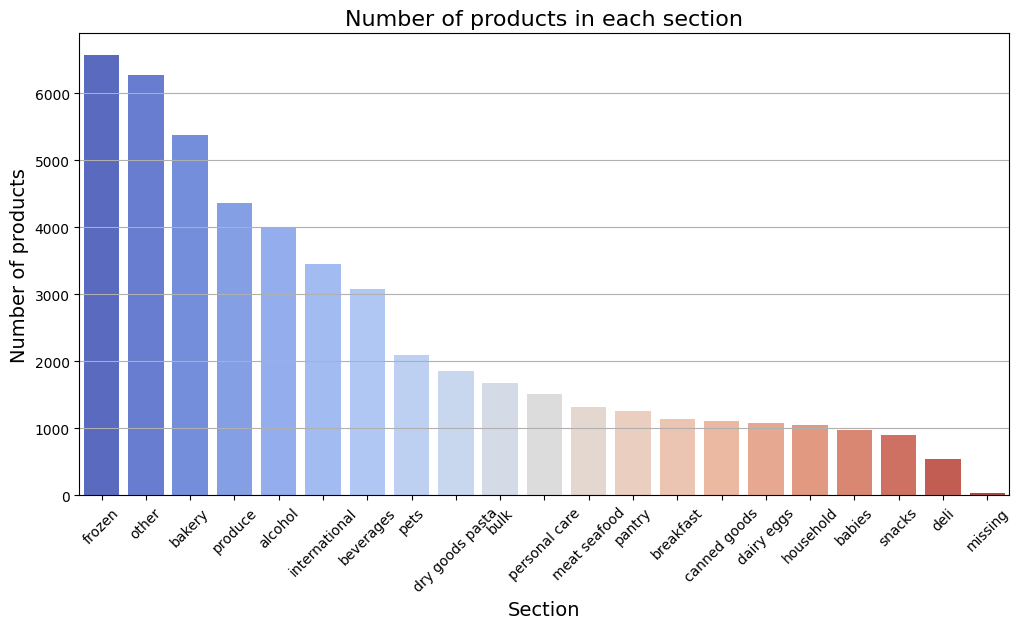

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# مثال وهمي لعدد المنتجات في كل قسم (يمكنك استبداله بالبيانات الفعلية إذا كانت لديك)
product_counts = {
    'department': departments['department'],
    'product_count': [6563, 6264, 5371, 4365, 4007, 3449, 3085, 2092, 1858, 1684, 1516, 1322, 1258, 1139, 1115, 1081, 1054,  972, 907, 548, 38]
}

# إنشاء DataFrame جديد
product_counts_df = pd.DataFrame(product_counts)

# إعداد الشكل
plt.figure(figsize=(12, 6))

# رسم بياني باستخدام Seaborn
sns.barplot(x='department', y='product_count', data=product_counts_df, palette='coolwarm')

# تخصيص الرسم
plt.title('Number of products in each section', fontsize=16)
plt.xlabel('Section', fontsize=14)
plt.ylabel('Number of products', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# عرض الرسم
plt.show()

In [25]:
orders_without_first_time_df = orders[orders['days_since_prior_order'] != -1]
orders_without_first_time_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2.0,3.0,7.0,15.0
2,473747,1,prior,3.0,3.0,12.0,21.0
3,2254736,1,prior,4.0,4.0,7.0,29.0
4,431534,1,prior,5.0,4.0,15.0,28.0
5,3367565,1,prior,6.0,2.0,7.0,19.0
...,...,...,...,...,...,...,...
373259,3050957,22488,prior,31.0,4.0,16.0,10.0
373260,344222,22488,prior,32.0,6.0,7.0,30.0
373261,1261052,22488,train,33.0,1.0,16.0,9.0
373263,2820439,22489,prior,2.0,3.0,18.0,6.0


In [26]:
orders_per_user = orders.groupby('user_id')['order_id'].nunique().reset_index()
orders_per_user = orders_per_user.rename(columns = {'order_id' : 'number of orders'})
orders_per_user

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,number of orders
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
22484,22485,7
22485,22486,30
22486,22487,4
22487,22488,33


In [27]:
orders_per_user['number of orders'].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16.59771443816977

In [28]:
orders_per_user['segments'] = pd.cut(
    orders_per_user['number of orders'],
    bins=[0, 8, 18, float('inf')],
    labels=['Low', 'Medium', 'High'],
    right=False
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
print(orders_per_user.head(20))

    user_id  number of orders segments
0         1                11   Medium
1         2                15   Medium
2         3                13   Medium
3         4                 6      Low
4         5                 5      Low
5         6                 4      Low
6         7                21     High
7         8                 4      Low
8         9                 4      Low
9        10                 6      Low
10       11                 8   Medium
11       12                 6      Low
12       13                13   Medium
13       14                14   Medium
14       15                23     High
15       16                 7      Low
16       17                41     High
17       18                 7      Low
18       19                10   Medium
19       20                 5      Low


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
orders_per_user['segments'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
segments,
Low,8036
Medium,7804
High,6649


In [31]:
top_products = products['product_name'].value_counts().head(5)
top_products_df = top_products.reset_index()
top_products_df.columns = ['Product Name', 'Number of Sales']
print(top_products_df)

                                      Product Name  Number of Sales
0                       Chocolate Sandwich Cookies                1
1                            Black Raspberry Water                1
2                               Organic Egg Whites                1
3                   Oikos Yogurt Drink, Strawberry                1
4  Peanut Butter Dark Chocolate Protein Chewy Bars                1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
least_sold_products = products['product_name'].value_counts().tail(5)

least_sold_products_df = least_sold_products.reset_index()
least_sold_products_df.columns = ['Product Name', 'Number of Sales']
print(least_sold_products_df)

                                Product Name  Number of Sales
0                                 Fajita Mix                1
1  Premium Enriched Egg Noodles Barley Shape                1
2                       Dishwasher Detergent                1
3                            Hummus Original                1
4                     Fresh Foaming Cleanser                1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
orders.groupby('order_dow')['order_id'].count().reset_index()\
.rename(columns = {
    'order_id' : 'total_orders'
})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_dow,total_orders
0,0.0,64913
1,1.0,63240
2,2.0,51225
3,3.0,47972
4,4.0,46572
5,5.0,50101
6,6.0,49242


In [34]:
top_sell = order_products_train.groupby("product_id")['order_id'].count().reset_index()
top_sell = top_sell.rename(columns = {
    'order_id' : "number_of_sell"
})
top_sell

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,number_of_sell
0,1,43
1,2,2
2,3,3
3,4,12
4,8,5
...,...,...
33602,49682,1
33603,49683,1260
33604,49686,4
33605,49687,1


In [35]:
first_card = order_products_train[order_products_train['add_to_cart_order']==1]
first_card

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1.0,1.0
8,36,39612,1.0,0.0
16,38,11913,1.0,0.0
25,96,20574,1.0,1.0
32,98,8859,1.0,1.0
...,...,...,...,...
718157,1765045,21137,1.0,1.0
718167,1765062,5077,1.0,1.0
718181,1765114,9736,1.0,0.0
718204,1765121,985,1.0,1.0


In [36]:
first_card['product_id'].value_counts().reset_index().head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,count
0,24852,2364
1,13176,2025
2,27845,573
3,47766,514
4,21137,482


In [37]:
order_products_trainorder_products_train = order_products_train.sample(frac=0.1)  # أخذ 10% من البيانات

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
df = pd.read_csv('/content/order_products__train.csv',nrows=10000)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
print(df.head(5))

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules# قراءة بيانات المنتجات في الطلبات


# إنشاء سلة الشراء
basket = (df
          .groupby(['order_id', 'product_id'])['add_to_cart_order']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))

# تحويل القيم إلى 1 و 0
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# استخراج مجموعات العناصر المتكررة باستخدام FP-Growth
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)

# استخراج قواعد الارتباط
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# طباعة القواعد
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-902c10bd2996>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


   antecedents consequents  antecedent support  consequent support   support  \
0      (13176)     (21137)            0.100106            0.104366  0.024494   
1      (21137)     (13176)            0.104366            0.100106  0.024494   
2      (13176)     (47209)            0.100106            0.057508  0.020234   
3      (47209)     (13176)            0.057508            0.100106  0.020234   
4      (21137)     (47209)            0.104366            0.057508  0.014909   
..         ...         ...                 ...                 ...       ...   
59     (47766)     (24852)            0.047923            0.132055  0.010650   
60     (47626)     (47766)            0.070288            0.047923  0.010650   
61     (47766)     (47626)            0.047923            0.070288  0.010650   
62      (4920)     (24852)            0.027689            0.132055  0.010650   
63     (24852)      (4920)            0.132055            0.027689  0.010650   

    confidence      lift  leverage  con

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
